<a href="https://colab.research.google.com/github/SatishDelhi/Complete-Python-3-Bootcamp/blob/master/VenkataDelhi_MicdropAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries






In [114]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
import seaborn as sns
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

#Read Data


In [115]:
df = pd.read_csv("micdrop_subsciptions_data_v1.csv")

In [116]:
print(df)

      click_date     platform  ...   fav_genre subscriber
0       12/27/17   mobile web  ...     hip_hop       True
1        1/10/18   mobile web  ...     hip_hop      False
2       12/15/17  desktop web  ...     hip_hop       True
3         1/6/18   mobile web  ...     hip_hop      False
4       12/20/17   mobile web  ...  indie_rock      False
...          ...          ...  ...         ...        ...
94189   12/22/17  desktop web  ...     hip_hop      False
94190   12/26/17   mobile web  ...     hip_hop      False
94191     1/9/18  desktop web  ...     hip_hop      False
94192   12/19/17   mobile web  ...     hip_hop      False
94193   12/28/17   mobile web  ...     hip_hop      False

[94194 rows x 9 columns]


#Data Analysis

**Understanding the Target Variable**

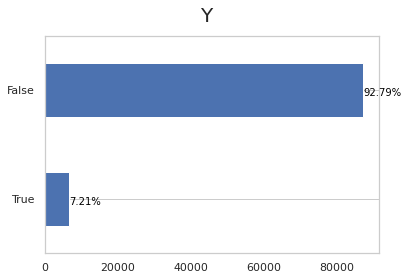

In [117]:
y = "Y"
ax = df['subscriber'].value_counts().sort_values().plot(kind="barh")
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
ax.grid(axis="x")
plt.suptitle(y, fontsize=20)
plt.show()

**Analysing the "target variable" shows that the data is imbalanced. Balancing the data is essential to improve the accuracy of the model prediction of the minority values in the target variable**

**Bivariate Analysis**

PLATFORM vs SUBSCRIPTION

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3772: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)


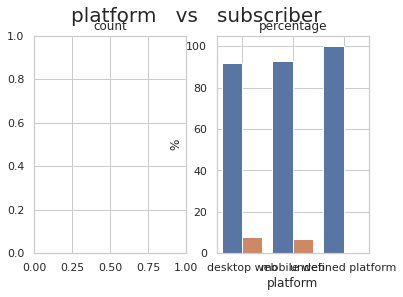

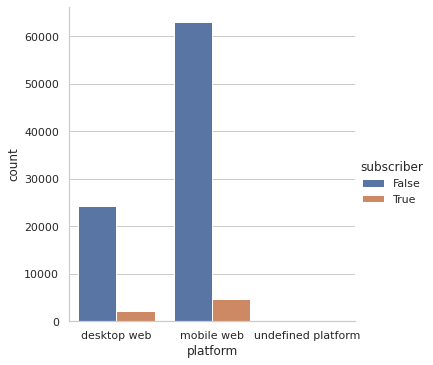

In [104]:
x, y = "platform", "subscriber"
fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False)
fig.suptitle(x+"   vs   "+y, fontsize=20)
### count
ax[0].title.set_text('count')
order = df.groupby(x)[y].count().index.tolist()
sns.catplot(x=x, hue=y, data=df, kind='count', order=order, ax=ax[0])
ax[0].grid(True)

### percentage
ax[1].title.set_text('percentage')
a = df.groupby(x)[y].count().reset_index()
a = a.rename(columns={y:"tot"})
b = df.groupby([x,y])[y].count()
b = b.to_frame()
b = b.rename(columns={y:0}).reset_index()
b = b.merge(a, how="left")
b["%"] = b[0] / b["tot"] *100
sns.barplot(x=x, y="%", hue=y, data=b,
            ax=ax[1]).get_legend().remove()
ax[1].grid(True)
plt.show()

Finding the Cramers Correlation to see  if the platform variable has any direct impact on the output

In [105]:
x, y = "platform", "subscriber"
cont_table = pd.crosstab(index=df[x], columns=df[y])
chi2_test = scipy.stats.chi2_contingency(cont_table)
chi2, p = chi2_test[0], chi2_test[1]
n = cont_table.sum().sum()
phi2 = chi2/n
r,k = cont_table.shape
phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
rcorr = r-((r-1)**2)/(n-1)
kcorr = k-((k-1)**2)/(n-1)
coeff = np.sqrt(phi2corr/min((kcorr-1), (rcorr-1)))
coeff, p = round(coeff, 3), round(p, 3)
conclusion = "Significant" if p < 0.05 else "Non-Significant"
print("Cramer Correlation:", coeff, conclusion, "(p-value:"+str(p)+")")

Cramer Correlation: 0.015 Significant (p-value:0.0)


**As the P-Value is greater than 0.05, "platform" has an impact on the output**

**fav Genre**

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3772: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)


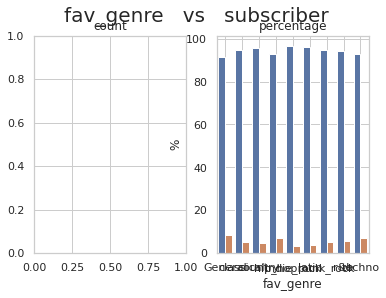

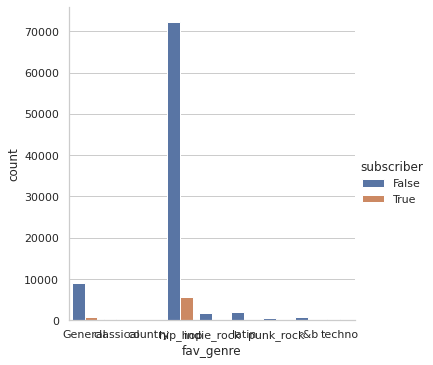

In [106]:
x, y = "fav_genre", "subscriber"
fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False)
fig.suptitle(x+"   vs   "+y, fontsize=20)
### count
ax[0].title.set_text('count')
order = df.groupby(x)[y].count().index.tolist()
sns.catplot(x=x, hue=y, data=df, kind='count', order=order, ax=ax[0])
ax[0].grid(True)

### percentage
ax[1].title.set_text('percentage')
a = df.groupby(x)[y].count().reset_index()
a = a.rename(columns={y:"tot"})
b = df.groupby([x,y])[y].count()
b = b.to_frame()
b = b.rename(columns={y:0}).reset_index()
b = b.merge(a, how="left")
b["%"] = b[0] / b["tot"] *100
sns.barplot(x=x, y="%", hue=y, data=b,
            ax=ax[1]).get_legend().remove()
ax[1].grid(True)
plt.show()

In [107]:
x, y = "fav_genre", "subscriber"
cont_table = pd.crosstab(index=df[x], columns=df[y])
chi2_test = scipy.stats.chi2_contingency(cont_table)
chi2, p = chi2_test[0], chi2_test[1]
n = cont_table.sum().sum()
phi2 = chi2/n
r,k = cont_table.shape
phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
rcorr = r-((r-1)**2)/(n-1)
kcorr = k-((k-1)**2)/(n-1)
coeff = np.sqrt(phi2corr/min((kcorr-1), (rcorr-1)))
coeff, p = round(coeff, 3), round(p, 3)
conclusion = "Significant" if p < 0.05 else "Non-Significant"
print("Cramer Correlation:", coeff, conclusion, "(p-value:"+str(p)+")")

Cramer Correlation: 0.033 Significant (p-value:0.0)


**As the P-Value is greater than 0.05, "platform" has an impact on the output**

**State**

In [110]:
x, y = "customer_state", "subscriber"
cont_table = pd.crosstab(index=df[x], columns=df[y])
chi2_test = scipy.stats.chi2_contingency(cont_table)
chi2, p = chi2_test[0], chi2_test[1]
n = cont_table.sum().sum()
phi2 = chi2/n
r,k = cont_table.shape
phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
rcorr = r-((r-1)**2)/(n-1)
kcorr = k-((k-1)**2)/(n-1)
coeff = np.sqrt(phi2corr/min((kcorr-1), (rcorr-1)))
coeff, p = round(coeff, 3), round(p, 3)
conclusion = "Significant" if p < 0.05 else "Non-Significant"
print("Cramer Correlation:", coeff, conclusion, "(p-value:"+str(p)+")")

Cramer Correlation: 0.069 Significant (p-value:0.0)


**As the P-Value is greater than 0.05, "State" has an impact on the output**

#Data Preparation

**Handle Missing Values**

In [118]:
df1 = df

In [125]:
df1.isna().sum()

click_date             0
platform               0
customer_city          0
customer_state         0
urban_flag             0
credit_card_on_file    0
student                0
fav_genre              0
subscriber             0
dtype: int64

Replace null values in fav_Genre with "General" to make it as one level in the category





In [120]:
df['fav_genre'].fillna("General", inplace = True) 

Remove nulls in output

In [122]:
df1 = df1.dropna(subset= ['subscriber'])

Remove nulls in features

In [124]:
df1 = df1.dropna(subset=['customer_state', 'customer_city'])


Convert the Boolean output variable to Binary

In [126]:
df1['subscriber'] = df1['subscriber'] * 1

DROP UNWANTED COLUMNS

As the data is only for 2 months, presuming the date would not have big impact in prediction. Date and Month may be considred as we collect more data for analysis

In [127]:
df1 = df1.drop(['click_date'], axis=1)

In [128]:
df1['customer_city'].nunique()

796

Inorder to reduce the issue of Dimensionality, excluding the customer city field from the analysis. The unique values in the city field are 796. While encoding this feature, it would increase the number of dimensions in the model. In future when there is more data, Top 20 cities or all of the cities can be considered in training the model. Currently excluding this field from the model

In [129]:
df1 = df1.drop(['customer_city'], axis=1)

In [130]:
df1

,platform,customer_state,urban_flag,credit_card_on_file,student,fav_genre,subscriber
0,mobile web,tx,1,0,0,hip_hop,1
1,mobile web,hi,0,0,0,hip_hop,0
2,desktop web,ga,1,0,0,hip_hop,1
3,mobile web,hi,0,0,0,hip_hop,0
4,mobile web,fl,0,0,0,indie_rock,0
...,...,...,...,...,...,...,...
94189,desktop web,hi,1,0,0,hip_hop,0
94190,mobile web,fl,1,0,1,hip_hop,0
94191,desktop web,mo,1,0,1,hip_hop,0
94192,mobile web,ga,0,0,0,hip_hop,0


In [131]:
print(df1)

          platform customer_state  urban_flag  ...  student   fav_genre subscriber
0       mobile web             tx           1  ...        0     hip_hop          1
1       mobile web             hi           0  ...        0     hip_hop          0
2      desktop web             ga           1  ...        0     hip_hop          1
3       mobile web             hi           0  ...        0     hip_hop          0
4       mobile web             fl           0  ...        0  indie_rock          0
...            ...            ...         ...  ...      ...         ...        ...
94189  desktop web             hi           1  ...        0     hip_hop          0
94190   mobile web             fl           1  ...        1     hip_hop          0
94191  desktop web             mo           1  ...        1     hip_hop          0
94192   mobile web             ga           0  ...        0     hip_hop          0
94193   mobile web             ca           1  ...        0     hip_hop          0

[94

Encoding the categorical independent variables by using Dummy Variables and not one hot encoding

---




In [132]:
cat_vars=['platform','fav_genre', 'customer_state']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df1[var], prefix=var)
    df2=df1.join(cat_list)
    df1=df2

In [133]:
cat_vars=['platform','fav_genre', 'customer_state']
data_vars=df1.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

Final Data

In [134]:
df_final=df1[to_keep]
colname = df_final.columns.values
colname

array(['urban_flag', 'credit_card_on_file', 'student', 'subscriber',
       'platform_desktop web', 'platform_mobile web', 'fav_genre_General',
       'fav_genre_classical', 'fav_genre_country', 'fav_genre_hip_hop',
       'fav_genre_indie_rock', 'fav_genre_latin', 'fav_genre_punk_rock',
       'fav_genre_r&b', 'fav_genre_techno', 'customer_state_ak',
       'customer_state_al', 'customer_state_ar', 'customer_state_az',
       'customer_state_ca', 'customer_state_co', 'customer_state_ct',
       'customer_state_dc', 'customer_state_de', 'customer_state_fl',
       'customer_state_ga', 'customer_state_hi', 'customer_state_ia',
       'customer_state_id', 'customer_state_il', 'customer_state_in',
       'customer_state_ks', 'customer_state_ky', 'customer_state_la',
       'customer_state_ma', 'customer_state_md', 'customer_state_me',
       'customer_state_mi', 'customer_state_mn', 'customer_state_mo',
       'customer_state_ms', 'customer_state_mt', 'customer_state_nc',
       'customer

In [135]:

df_final = df_final[colname]

In [136]:
df_final.head()

,urban_flag,credit_card_on_file,student,subscriber,platform_desktop web,platform_mobile web,fav_genre_General,fav_genre_classical,fav_genre_country,fav_genre_hip_hop,fav_genre_indie_rock,fav_genre_latin,fav_genre_punk_rock,fav_genre_r&b,fav_genre_techno,customer_state_ak,customer_state_al,customer_state_ar,customer_state_az,customer_state_ca,customer_state_co,customer_state_ct,customer_state_dc,customer_state_de,customer_state_fl,customer_state_ga,customer_state_hi,customer_state_ia,customer_state_id,customer_state_il,customer_state_in,customer_state_ks,customer_state_ky,customer_state_la,customer_state_ma,customer_state_md,customer_state_me,customer_state_mi,customer_state_mn,customer_state_mo,customer_state_ms,customer_state_mt,customer_state_nc,customer_state_ne,customer_state_nj,customer_state_nv,customer_state_oh,customer_state_ok,customer_state_or,customer_state_pa,customer_state_ri,customer_state_sc,customer_state_tn,customer_state_tx,customer_state_ut,customer_state_va,customer_state_wa,customer_state_wi
0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Dependent and Independent Variables

In [137]:
  x = df_final.loc[:, df_final.columns != 'subscriber'].values
  y = df_final.loc[:, df_final.columns == 'subscriber'].values
  y=y.astype('int')

In [138]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
columns = df_final.iloc[:, :-1].columns.values

os_data_x,os_data_y=os.fit_sample(x_train, y_train)
os_data_x = pd.DataFrame(data=os_data_x,columns=columns)
os_data_y= pd.DataFrame(data=os_data_y,columns=['subscriber'])

# Check the numbers of our data
print("length of oversampled data is ",len(os_data_x))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['subscriber']==0]))
print("Number of subscription",len(os_data_y[os_data_y['subscriber']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['subscriber']==0])/len(os_data_x))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['subscriber']==1])/len(os_data_x))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


length of oversampled data is  122452
Number of no subscription in oversampled data 61226
Number of subscription 61226
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


Balancing data by Over Sampling using SMOTE

In [139]:
columns = df_final.iloc[:, :-1].columns.values
columns

array(['urban_flag', 'credit_card_on_file', 'student', 'subscriber',
       'platform_desktop web', 'platform_mobile web', 'fav_genre_General',
       'fav_genre_classical', 'fav_genre_country', 'fav_genre_hip_hop',
       'fav_genre_indie_rock', 'fav_genre_latin', 'fav_genre_punk_rock',
       'fav_genre_r&b', 'fav_genre_techno', 'customer_state_ak',
       'customer_state_al', 'customer_state_ar', 'customer_state_az',
       'customer_state_ca', 'customer_state_co', 'customer_state_ct',
       'customer_state_dc', 'customer_state_de', 'customer_state_fl',
       'customer_state_ga', 'customer_state_hi', 'customer_state_ia',
       'customer_state_id', 'customer_state_il', 'customer_state_in',
       'customer_state_ks', 'customer_state_ky', 'customer_state_la',
       'customer_state_ma', 'customer_state_md', 'customer_state_me',
       'customer_state_mi', 'customer_state_mn', 'customer_state_mo',
       'customer_state_ms', 'customer_state_mt', 'customer_state_nc',
       'customer

#Recursive Feature Elimination

In [140]:
df_final_vars=df_final.columns.values.tolist()
df_final_vars
Y = ['subscriber']
X = [i for i in df_final_vars if i not in Y]

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg, 60)
rfe = rfe.fit(os_data_x, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


RFE shows all the features are relevant

In [141]:
df_final_vars

['urban_flag',
 'credit_card_on_file',
 'student',
 'subscriber',
 'platform_desktop web',
 'platform_mobile web',
 'fav_genre_General',
 'fav_genre_classical',
 'fav_genre_country',
 'fav_genre_hip_hop',
 'fav_genre_indie_rock',
 'fav_genre_latin',
 'fav_genre_punk_rock',
 'fav_genre_r&b',
 'fav_genre_techno',
 'customer_state_ak',
 'customer_state_al',
 'customer_state_ar',
 'customer_state_az',
 'customer_state_ca',
 'customer_state_co',
 'customer_state_ct',
 'customer_state_dc',
 'customer_state_de',
 'customer_state_fl',
 'customer_state_ga',
 'customer_state_hi',
 'customer_state_ia',
 'customer_state_id',
 'customer_state_il',
 'customer_state_in',
 'customer_state_ks',
 'customer_state_ky',
 'customer_state_la',
 'customer_state_ma',
 'customer_state_md',
 'customer_state_me',
 'customer_state_mi',
 'customer_state_mn',
 'customer_state_mo',
 'customer_state_ms',
 'customer_state_mt',
 'customer_state_nc',
 'customer_state_ne',
 'customer_state_nj',
 'customer_state_nv',
 'cus

ANOVA and LASSO to find the feature importance wrt to the "target variable"

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Index(['fav_genre_punk_rock', 'fav_genre_r&b', 'fav_genre_techno',
       'customer_state_al', 'customer_state_co', 'customer_state_hi',
       'customer_state_ia', 'customer_state_ks', 'customer_state_mo',
       'customer_state_ms'],
      dtype='object')
Index(['credit_card_on_file', 'platform_mobile web', 'fav_genre_hip_hop',
       'fav_genre_indie_rock', 'fav_genre_r&b', 'customer_state_de',
       'customer_state_fl', 'customer_state_ga', 'customer_state_hi',
       'customer_state_mn'],
      dtype='object')


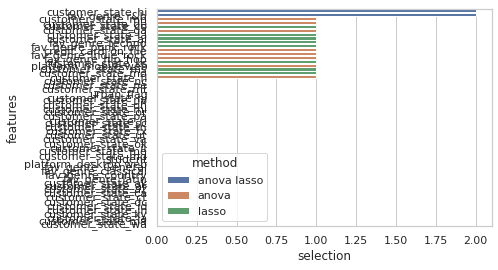

In [142]:
X = os_data_x.drop("subscriber", axis=1).values
y = os_data_y['subscriber'].values
feature_names = os_data_x.drop("subscriber", axis=1).columns
## Anova
selector = feature_selection.SelectKBest(score_func=  
               feature_selection.f_classif, k=10).fit(X,y)
anova_selected_features = feature_names[selector.get_support()]

## Lasso regularization
selector = feature_selection.SelectFromModel(estimator= 
              linear_model.LogisticRegression(C=1, penalty="l1", 
              solver='liblinear'), max_features=10).fit(X,y)
lasso_selected_features = feature_names[selector.get_support()]


## Plot
dtf_features = pd.DataFrame({"features":feature_names})
dtf_features["anova"] = dtf_features["features"].apply(lambda x: "anova" if x in anova_selected_features else "")
dtf_features["num1"] = dtf_features["features"].apply(lambda x: 1 if x in anova_selected_features else 0)
dtf_features["lasso"] = dtf_features["features"].apply(lambda x: "lasso" if x in lasso_selected_features else "")
dtf_features["num2"] = dtf_features["features"].apply(lambda x: 1 if x in lasso_selected_features else 0)
dtf_features["method"] = dtf_features[["anova","lasso"]].apply(lambda x: (x[0]+" "+x[1]).strip(), axis=1)
dtf_features["selection"] = dtf_features["num1"] + dtf_features["num2"]
sns.barplot(y="features", x="selection", hue="method", data=dtf_features.sort_values("selection", ascending=False), dodge=False)


## list the fetaures selected by Anova and Lasso
print(lasso_selected_features)
print(anova_selected_features)

#Train the Model

In [143]:
os_data_x.head()

,urban_flag,credit_card_on_file,student,subscriber,platform_desktop web,platform_mobile web,fav_genre_General,fav_genre_classical,fav_genre_country,fav_genre_hip_hop,fav_genre_indie_rock,fav_genre_latin,fav_genre_punk_rock,fav_genre_r&b,fav_genre_techno,customer_state_ak,customer_state_al,customer_state_ar,customer_state_az,customer_state_ca,customer_state_co,customer_state_ct,customer_state_dc,customer_state_de,customer_state_fl,customer_state_ga,customer_state_hi,customer_state_ia,customer_state_id,customer_state_il,customer_state_in,customer_state_ks,customer_state_ky,customer_state_la,customer_state_ma,customer_state_md,customer_state_me,customer_state_mi,customer_state_mn,customer_state_mo,customer_state_ms,customer_state_mt,customer_state_nc,customer_state_ne,customer_state_nj,customer_state_nv,customer_state_oh,customer_state_ok,customer_state_or,customer_state_pa,customer_state_ri,customer_state_sc,customer_state_tn,customer_state_tx,customer_state_ut,customer_state_va,customer_state_wa
0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [155]:
X_names = ['fav_genre_punk_rock', 'fav_genre_r&b', 'fav_genre_techno',
       'customer_state_al', 'customer_state_co', 'customer_state_hi',
       'customer_state_ia', 'customer_state_ks', 'customer_state_mo',
       'customer_state_ms','credit_card_on_file', 'platform_mobile web', 'fav_genre_hip_hop',
       'fav_genre_indie_rock', 'customer_state_de',
       'customer_state_fl', 'customer_state_ga','customer_state_mn', 'student', 'urban_flag']
X=os_data_x[X_names]
Y=os_data_y['subscriber']
import statsmodels.api as sm
logit_model=sm.Logit(Y,X)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.675924
         Iterations: 35


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                Results: Logit
Model:                   Logit                Pseudo R-squared:     0.025      
Dependent Variable:      subscriber           AIC:                  165576.5636
Date:                    2021-04-05 19:01     BIC:                  165770.8731
No. Observations:        122452               Log-Likelihood:       -82768.    
Df Model:                19                   LL-Null:              -84877.    
Df Residuals:            122432               LLR p-value:          0.0000     
Converged:               0.0000               Scale:                1.0000     
No. Iterations:          35.0000                                               
-------------------------------------------------------------------------------
                      Coef.    Std.Err.     z     P>|z|     [0.025     0.975]  
-------------------------------------------------------------------------------
fav_genre_punk_rock   -0.6319     0.0754  -8.3833 0.0000     -0.7796    -

Removing the columns with high P-Values

In [161]:
X_names = ['fav_genre_punk_rock', 'fav_genre_r&b', 'fav_genre_techno',
       'customer_state_al', 'customer_state_co', 'customer_state_hi',
       'customer_state_ia','credit_card_on_file', 'platform_mobile web', 'fav_genre_hip_hop',
       'fav_genre_indie_rock', 'customer_state_de',
       'customer_state_fl', 'customer_state_ga','customer_state_mn', 'urban_flag']
X=os_data_x[X_names]
Y=os_data_y['subscriber']
import statsmodels.api as sm
logit_model=sm.Logit(Y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.676297
         Iterations 8
                           Results: Logit
Model:               Logit             Pseudo R-squared:  0.024      
Dependent Variable:  subscriber        AIC:               165659.8070
Date:                2021-04-05 19:02  BIC:               165815.2545
No. Observations:    122452            Log-Likelihood:    -82814.    
Df Model:            15                LL-Null:           -84877.    
Df Residuals:        122436            LLR p-value:       0.0000     
Converged:           1.0000            Scale:             1.0000     
No. Iterations:      8.0000                                          
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
fav_genre_punk_rock  -0.6427   0.0753  -8.5371 0.0000 -0.7903 -0.4952
fav_genre_r&b   

#XGBoost Classifier Model Fitting

In [166]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
model = XGBClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.5f' % mean(scores))

Mean ROC AUC: 0.60014


Predict the Test Results

In [168]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

#Model Testing

**Confusion Matrix**

In [169]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 5602 12738]
 [ 3163 15233]]


0.5671548344947736

Recall, Precision and f1-score

In [170]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.31      0.41     18340
           1       0.54      0.83      0.66     18396

    accuracy                           0.57     36736
   macro avg       0.59      0.57      0.54     36736
weighted avg       0.59      0.57      0.54     36736



**ROC**

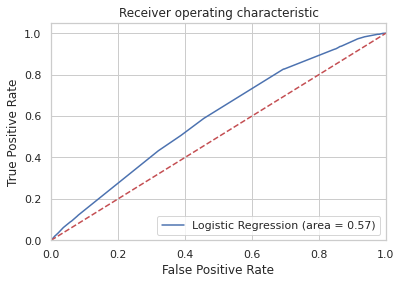

In [171]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()